## Predicting Default Risk

## Abdullah Ficici

# Business and Data Understanding

## What decisions need to be made?
I am a data scientist working for a small bank. This week the number of loan applications increased by 150% from 200/week to 500/week. 

The manager sees this new influx as a great opportunity and wants me to figure out how to process all of these loan applications within one week.

I'll use Python libraries to process the loan applications. 

I will classify the loan applications as “Creditworthy” or “Not-Creditworthy” using Random Forest.

## What data is needed to inform those decisions?
In order to predict the "Creditworthy” customers, I need the data on all past applications to build
and train the model. The past application data has the following features:

“Credit-Application-Result”, “Account-Balance”, “Duration-of-Credit-Month”,
"Payment-Status-of-Previous-Credit”, “Purpose", "Credit-Amount",
"Value-Savings-Stocks”, “Length-of-current-employment”, “Instalment-per-cent",
"Guarantors", "Duration-in-Current-address", "Most-valuable-available-asset",
"Age-years", "Concurrent-Credits", "Type-of-apartment", "No-of-Credits-at-this-Bank”,
"Occupation”, “No-of-dependents", "Telephone", and "Foreign-Worker”.
After building the model, I will apply the model to new data on 500 new applications.

## What kind of model (Continuous, Binary, Non-Binary, Time-Series) do we need to use to help make these decisions?
I'm going to classify new customers as “Creditworthy” or “Not-Creditworthy".
Since the problem has two answers i.e. "Yes" and "No", I'll go for Binary Classification model.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
training_data = pd.read_csv("credit-data-training.csv")

In [3]:
training_data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [4]:
training_data.shape

(500, 20)

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

In [6]:
training_data.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


## Building the Training Set
Here are some guidelines to help guide data cleanup:

●	For numerical data fields, are there any fields that highly-correlate with each other? The correlation should be at least .70 to be considered “high”.

●	Are there any missing data for each of the data fields? Fields with a lot of missing data should be removed

●	Are there only a few values in a subset of your data field? Does the data field look very uniform (there is only one value for the entire field?). This is called “low variability” and I will remove fields that have low variability. 

I will impute data using the median of the entire data field instead of removing a few data points.

## Missing Values

In [7]:
training_data.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [8]:
percent_missing = training_data.isnull().sum() * 100 / len(training_data)
percent_missing

Credit-Application-Result             0.0
Account-Balance                       0.0
Duration-of-Credit-Month              0.0
Payment-Status-of-Previous-Credit     0.0
Purpose                               0.0
Credit-Amount                         0.0
Value-Savings-Stocks                  0.0
Length-of-current-employment          0.0
Instalment-per-cent                   0.0
Guarantors                            0.0
Duration-in-Current-address          68.8
Most-valuable-available-asset         0.0
Age-years                             2.4
Concurrent-Credits                    0.0
Type-of-apartment                     0.0
No-of-Credits-at-this-Bank            0.0
Occupation                            0.0
No-of-dependents                      0.0
Telephone                             0.0
Foreign-Worker                        0.0
dtype: float64

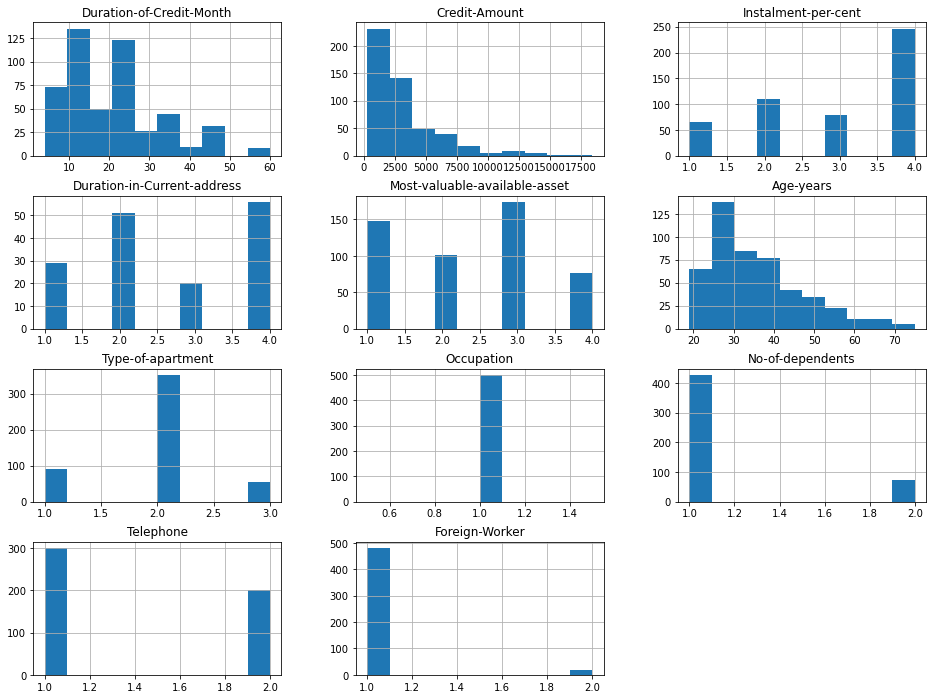

In [9]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
training_data.hist(ax=ax)
plt.show()

In [10]:
training_data = training_data.drop(['Duration-in-Current-address', 'Foreign-Worker', 'Concurrent-Credits', 'Guarantors', 'Occupation','No-of-dependents'], axis=1)

In [11]:
training_data.shape

(500, 14)

In [12]:
training_data['Age-years'].median()

33.0

In [13]:
training_data = training_data.fillna(training_data.median())

- The field “Duration-in-Current-address" has 68.8% missing values, so it is removed. 

- The fields 'Foreign-Worker', 'Concurrent-Credits', 'Guarantors', "Ocupation', and 'No-of-dependents' have low variability, they are removed. 

- The "Age-years” variable has 2.4% of missing values, they are imputed with median 33.

In [14]:
training_data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Telephone
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1,1


## Feature Selection

In [15]:
training_data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Telephone
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1,1


In [16]:
df1=pd.get_dummies(training_data)
df1.columns

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Telephone', 'Credit-Application-Result_Creditworthy',
       'Credit-Application-Result_Non-Creditworthy',
       'Account-Balance_No Account', 'Account-Balance_Some Balance',
       'Payment-Status-of-Previous-Credit_No Problems (in this bank)',
       'Payment-Status-of-Previous-Credit_Paid Up',
       'Payment-Status-of-Previous-Credit_Some Problems',
       'Purpose_Home Related', 'Purpose_New car', 'Purpose_Other',
       'Purpose_Used car', 'Value-Savings-Stocks_< £100',
       'Value-Savings-Stocks_None', 'Value-Savings-Stocks_£100-£1000',
       'Length-of-current-employment_1-4 yrs',
       'Length-of-current-employment_4-7 yrs',
       'Length-of-current-employment_< 1yr', 'No-of-Credits-at-this-Bank_1',
       'No-of-Credits-at-this-Bank_More than 1'],
      dtype='object')

In [17]:
training_data.replace("No Account", "No_Account", inplace=True)

In [18]:
X = training_data.drop("Credit-Application-Result", axis=1)
y = training_data[["Credit-Application-Result"]]

In [19]:
training_data.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank', 'Telephone'],
      dtype='object')

In [20]:
y= pd.get_dummies(y, drop_first=True)

In [21]:
y.head()

,Credit-Application-Result_Non-Creditworthy
0,0
1,0
2,0
3,0
4,0


In [22]:
X = pd.get_dummies(X)

In [23]:
y.columns

Index(['Credit-Application-Result_Non-Creditworthy'], dtype='object')

In [24]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [25]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [26]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(class_weight = {0:0.75, 1:0.25})

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8558139534883721


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[92, 11],
       [20, 92]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       103
           1       0.89      0.82      0.86       112

    accuracy                           0.86       215
   macro avg       0.86      0.86      0.86       215
weighted avg       0.86      0.86      0.86       215



In [30]:
X.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Telephone,Account-Balance_No_Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,4,1494,1,1,33.0,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,4,1494,1,1,29.0,2,1,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,4,1544,2,1,42.0,2,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,4,3380,1,1,37.0,2,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
4,6,343,4,1,27.0,2,1,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 24 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Duration-of-Credit-Month                                      716 non-null    int64  
 1   Credit-Amount                                                 716 non-null    int64  
 2   Instalment-per-cent                                           716 non-null    int64  
 3   Most-valuable-available-asset                                 716 non-null    int64  
 4   Age-years                                                     716 non-null    float64
 5   Type-of-apartment                                             716 non-null    int64  
 6   Telephone                                                     716 non-null    int64  
 7   Account-Balance_No_Account                                    716 non-n

In [32]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Credit-Amount                                                   0.137365
Duration-of-Credit-Month                                        0.117648
Account-Balance_Some Balance                                    0.111286
Age-years                                                       0.095436
Value-Savings-Stocks_£100-£1000                                 0.047998
Most-valuable-available-asset                                   0.046421
Instalment-per-cent                                             0.046052
Account-Balance_No_Account                                      0.037096
No-of-Credits-at-this-Bank_1                                    0.036475
Payment-Status-of-Previous-Credit_Paid Up                       0.032608
Length-of-current-employment_< 1yr                              0.032065
Payment-Status-of-Previous-Credit_No Problems (in this bank)    0.029697
Type-of-apartment                                               0.028542
Length-of-current-employment_1-4 yrs               

In [33]:
feature_imp = feature_imp[feature_imp >= 0.01]
feature_imp

Credit-Amount                                                   0.137365
Duration-of-Credit-Month                                        0.117648
Account-Balance_Some Balance                                    0.111286
Age-years                                                       0.095436
Value-Savings-Stocks_£100-£1000                                 0.047998
Most-valuable-available-asset                                   0.046421
Instalment-per-cent                                             0.046052
Account-Balance_No_Account                                      0.037096
No-of-Credits-at-this-Bank_1                                    0.036475
Payment-Status-of-Previous-Credit_Paid Up                       0.032608
Length-of-current-employment_< 1yr                              0.032065
Payment-Status-of-Previous-Credit_No Problems (in this bank)    0.029697
Type-of-apartment                                               0.028542
Length-of-current-employment_1-4 yrs               

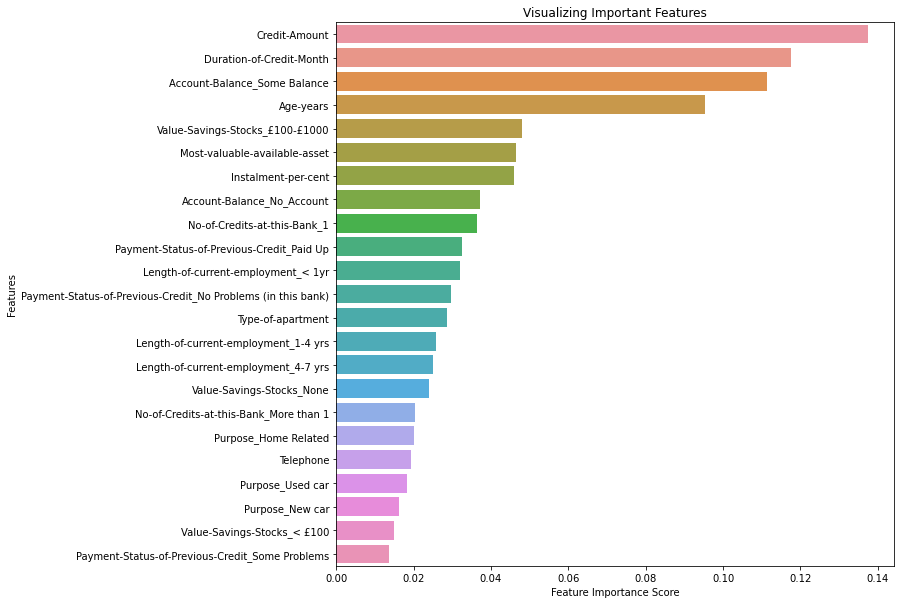

In [34]:
fig = plt.figure(figsize = (10, 10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

I dropped the feature with Feature Importance Score is less than 0.01.
- Purpose_Other 

This model chose 'Credit-Amount', 'Duration-of-Credit-Month' to be by far the most important variables. Followed by 'Account-Balance_Some Balance' and 'Age-years'.